In [77]:
import cv2
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np

# Display all outputs in the cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Modify numpy print options to display the entire array
np.set_printoptions(threshold=np.inf)

In [45]:
pil_image = Image.open('../images/chart.PNG')
# Display the size
display("Image size:", pil_image.size)

# Display the mode
display("Image mode:", pil_image.mode)

'Image size:'

(518, 391)

'Image mode:'

'RGBA'

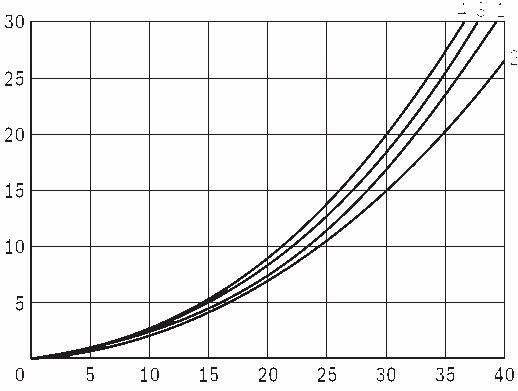

In [87]:
quantized_img = pil_image.quantize(2)
quantized_img

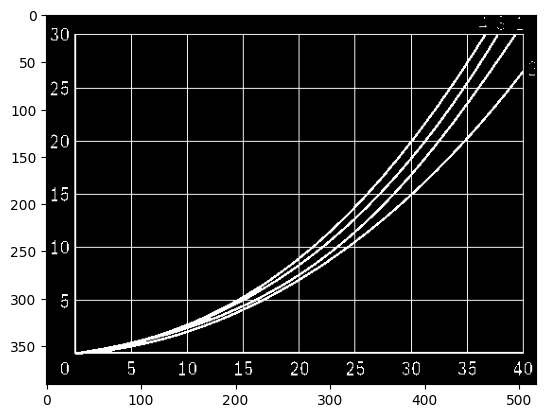

In [99]:
quant_img = np.array(quantized_img)
plt.imshow(quant_img, cmap = "gray")

In [97]:
quant_img[240:260, 80:100]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

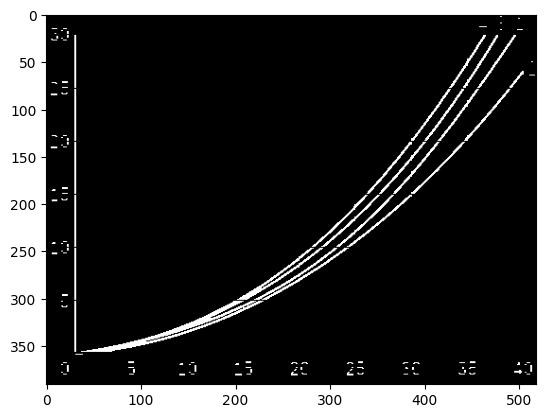

In [105]:
# Function to replace 32 with 255 if condition is satisfied
def replace_pixels(image):
    for row in image:
        for i in range(1, len(row) - 1):
            if row[i] == 1 and row[i-1] == 0 and row[i+1] == 0:
                row[i] = 0
    #Find rows with non-zero sum
    non_zero_sum_rows = np.where(np.sum(image, axis=1) > 100)[0]
    
    # Set values of those rows to zero
    image[non_zero_sum_rows] = 0
    return image

# Apply the function to the image
new_image = replace_pixels(quant_img)

plt.imshow(new_image, cmap = "gray")

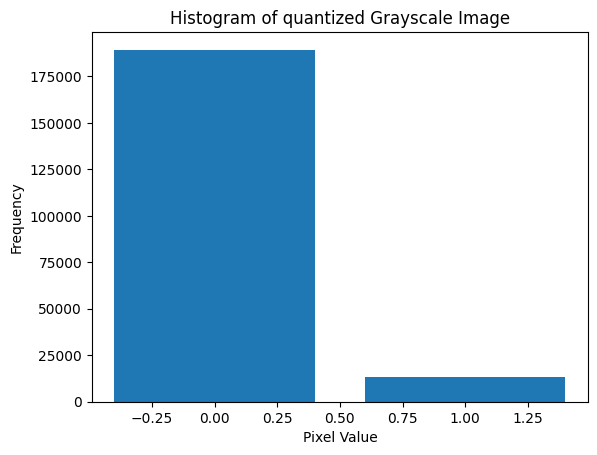

In [56]:
# Convert PIL image to NumPy array
np_image = np.array(quantized_img)

hist = cv2.calcHist([np_image],[0],None, [2], [0,2])

# Plot the histogram as a bar graph
plt.figure()
plt.bar(np.arange(len(hist)), hist.squeeze())
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of quantized Grayscale Image')
plt.show();

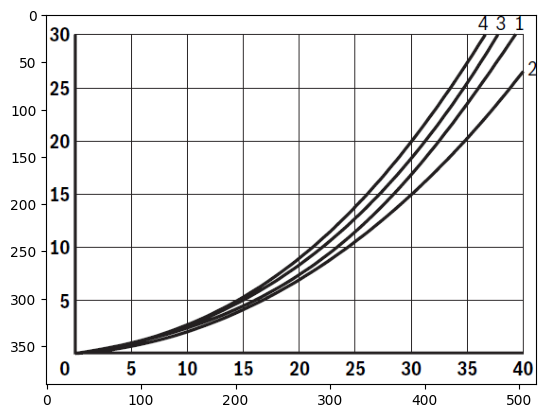

In [46]:
plt.imshow(pil_image);

In [4]:
chart_grey = ImageOps.grayscale(pil_image)
chart_grey.size

(518, 391)

The choice between Pillow (PIL) and OpenCV for image quantization depends on various factors such as ease of use, performance, and specific requirements of your project. Here's a comparison of both libraries for image quantization:

1. **Pillow (PIL)**:
   - Pillow is a Python Imaging Library that provides a simple and intuitive interface for working with images.
   - It offers built-in support for various image processing tasks, including quantization.
   - Pillow provides the `quantize()` method, which allows you to quantize an image by reducing the number of colors.
   - Pillow is easy to use and suitable for basic image processing tasks.

2. **OpenCV**:
   - OpenCV is a powerful computer vision library that offers extensive functionality for image and video processing.
   - While OpenCV does not have a built-in function specifically for image quantization, you can achieve quantization using techniques like k-means clustering or manual intensity reduction.
   - OpenCV provides robust support for image manipulation and processing, making it suitable for more advanced image processing tasks.
   - OpenCV offers high performance and is optimized for speed, making it suitable for real-time applications and large-scale image processing tasks.

In summary, if you need a simple and straightforward solution for image quantization and your requirements are not too complex, Pillow may be a better choice due to its ease of use and built-in support for image processing tasks. However, if you require advanced image processing capabilities or need to achieve high performance, OpenCV may be more suitable, despite the need for slightly more manual implementation for image quantization.

RGBA stands for **Red, Green, Blue, Alpha**. It's a common color model used for representing color and opacity in computer graphics and web development. Here's a breakdown of its components:

- **Red, Green, Blue (RGB):** These are the three primary color channels that combine to create a vast range of colors on a display. Each channel typically holds a value between 0 (no intensity) and 255 (maximum intensity). By varying the intensity of each channel, you can create different colors.

- **Alpha:** This channel represents the opacity of a color. It's a value between 0.0 (fully transparent) and 1.0 (fully opaque). A color with an alpha of 0.0 will be completely invisible, while a color with an alpha of 1.0 will be fully solid. Values between 0.0 and 1.0 create varying degrees of transparency.

**Applications of RGBA:**

- **Image Editing and Graphic Design:** RGBA is widely used in image editing software like Photoshop and GIMP. It allows designers to create semi-transparent elements, overlays, and effects.

- **Web Development:** RGBA is the standard color model for web graphics and user interfaces (UIs). It enables the creation of transparent elements like buttons, menus, and dropdowns. This allows layering and blending of visual elements for a more sophisticated UI design.

- **3D Graphics and Video Effects:** RGBA is also employed in 3D graphics and video effects for rendering semi-transparent objects and visual effects.

**Benefits of RGBA:**

- **Richer Visuals:** RGBA allows for a wider range of visual effects by incorporating transparency.
- **Flexibility in Design:** Designers and developers can create layered and overlapping elements with varying levels of transparency, leading to more creative and interactive interfaces.
- **Standardized Format:** RGBA is a well-established format supported by most image editing software, web browsers, and graphics libraries.

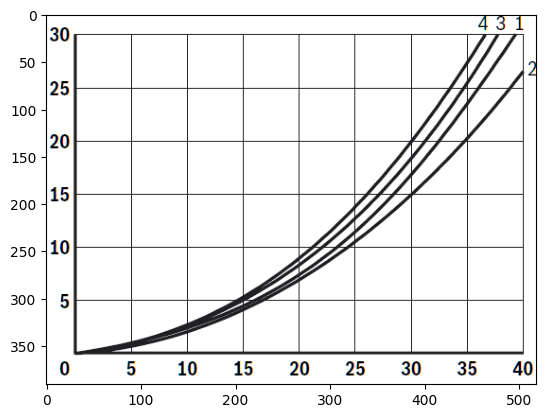

In [32]:
# Load the image
img = cv2.imread("../images/chart.PNG")

# Convert to grayscale (weighted average of RGB channels)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # OpenCV uses BGR by default

# Display the original and grayscale images (optional)
plt.imshow(img, cmap="gray")

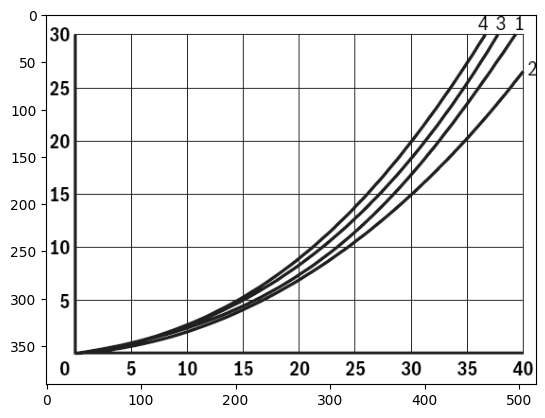

In [20]:
plt.imshow(gray_img, cmap="gray")

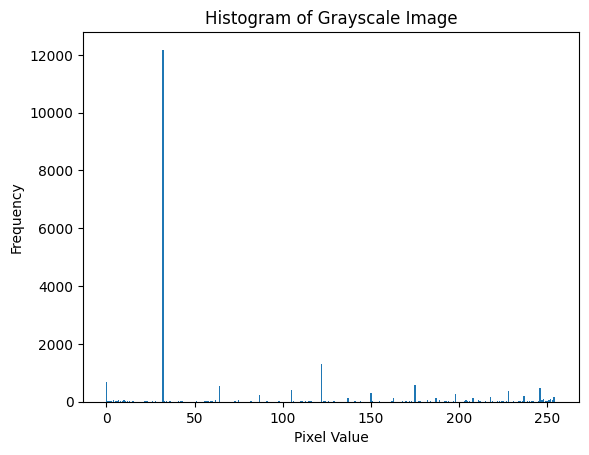

In [33]:
hist = cv2.calcHist([gray_img],[0],None, [256], [0,255])

# Plot the histogram as a bar graph
plt.figure()
plt.bar(np.arange(len(hist)), hist.squeeze())
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Grayscale Image')
plt.show();

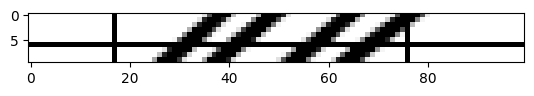

In [40]:
plt.imshow(gray_img[240:250,250:350], cmap = 'gray')

In [74]:
gray_img[240:250,250:350]

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255,  32, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 228, 105,  32,  32,
         32,  32, 198, 255, 255, 255, 255, 187,  32,  32,  32,  32,  64,
        228, 255, 255, 255, 255, 255, 255, 255, 255, 246, 105,  32,  32,
         32,  32, 150, 255, 255, 255, 255, 255, 237, 105,  32,  32,  32,
         32, 105, 237, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255,  32, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 228,  64,  32,  32,  32,
         64, 208, 255, 255, 255, 255, 150,  32,  32,  32,  32, 105, 237,
        255, 255, 255, 255, 255, 255, 255, 255, 228,  64,  32,  32,  32,
         32, 187, 255, 255, 255, 255, 255, 208,  64,  32,  32,  32,  3

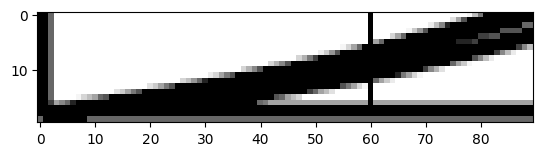

In [80]:
plt.imshow(gray_img[340:360,30:120], cmap = 'gray')

In [81]:
gray_img[340:360,30:120]

array([[ 32,  32, 122, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255,  32, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        246, 198, 137,  32,  32,  32,  32,  32,  32,  32,  32,  32],
       [ 32,  32, 122, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255,  32, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 228, 175, 105,
         32,  32,  32,  32,  32,  32,  32,  32,  32,  3

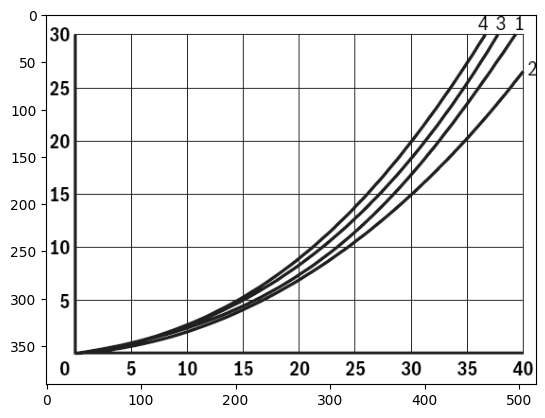

In [34]:
# Find the index of the bin with the highest count
max_count_index = np.argmax(hist)

# Load the image
img = cv2.imread("../images/chart.PNG")

# Convert to grayscale (weighted average of RGB channels)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # OpenCV uses BGR by default

# Replace all pixels with max_count_index with 0
#gray_img[gray_img == max_count_index] = 0
# Display the modified image
plt.imshow(gray_img, cmap = "gray")

In [61]:
contr_image = cv2.equalizeHist(gray_img)
cv2.imshow("equalize Hist",contr_image)

The `cv2.calcHist()` function in OpenCV is used to calculate the histogram of an image. It takes several arguments to specify the image, channels, mask, histogram size, range, and other parameters. Here are the arguments for the `cv2.calcHist()` function:

1. **images**: It is the source image of type uint8 or float32. For the histogram of a grayscale image, pass a single image. For the histogram of a color image, pass a list of images where each image represents a channel.

2. **channels**: It is the index of the channel for which you compute the histogram. For grayscale images, the channel should be [0]. For color images, you can specify the index of the color channel (0 for blue, 1 for green, and 2 for red).

3. **mask**: It is an optional mask. If provided, only the pixels selected by the mask will be used to compute the histogram.

4. **histSize**: It is an array representing the number of bins for each channel. For example, [256] for grayscale images or [256, 256, 256] for color images.

5. **ranges**: It is an array representing the range of possible pixel values for each channel. For grayscale images, the range is [0, 256]. For color images, the range for each channel is [0, 256].

6. **accumulate**: It is a boolean value that specifies whether to accumulate the histogram or not. If set to True, the histogram is not cleared in the beginning and is incremented with the histogram of subsequent images.

The function returns the computed histogram as a numpy array.

Here's an example usage of `cv2.calcHist()`:

```python
import cv2
import numpy as np

# Read an image
image = cv2.imread('image.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Compute histogram for the grayscale image
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Display the histogram
print(hist)
```

In this example, `cv2.calcHist()` computes the histogram for the grayscale version of the input image. The `hist` variable stores the computed histogram, which can be further analyzed or visualized as needed.

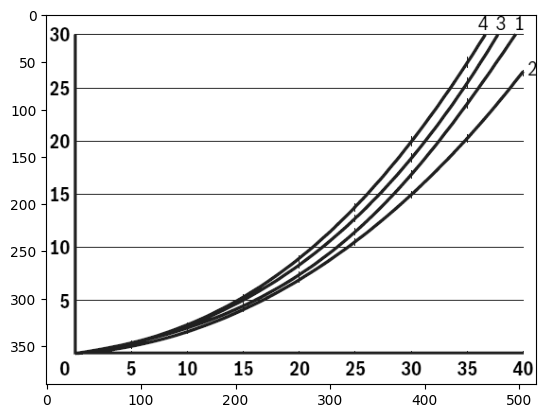

In [86]:
# Load the image
img = cv2.imread("../images/chart.PNG")

# Convert to grayscale (weighted average of RGB channels)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # OpenCV uses BGR by default

# Function to replace 32 with 255 if condition is satisfied
def replace_pixels(image):
    for row in image:
        for i in range(1, len(row) - 1):
            if row[i] == 32 and row[i-1] == 255 and row[i+1] == 255:
                row[i] = 255
    return image

# Apply the function to the image
new_image = replace_pixels(gray_img)

# Display the original and modified images
plt.imshow(new_image, cmap = "gray")